<a href="https://colab.research.google.com/github/gopalsruthi/hello-github/blob/master/Diabetes_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import io
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns    
from pandas.api.types import CategoricalDtype 

from sklearn.preprocessing import Imputer, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

**Step 1: Uploading CSV file to colab notebook**

In [2]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [3]:
path = "/gdrive/My Drive/Colab Notebooks/diabetes2cleaned.csv"
import os;os.path.exists(path)

True

**Step 2: Saving the CSV file as a pandas dataframe**

In [4]:

import pandas as pd
diab = pd.read_csv(path, index_col=0)
diab.head()


,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


**Step 3: Deleting 'skin' and 'insu' columns as they are highly correlated and have a large number of NAs**

In [5]:
print(diab.corr())
diab.isna().sum()
del diab['skin']
del diab['insu']

           preg      plas      pres  ...      pedi       age     class
preg   1.000000  0.128135  0.214178  ... -0.033523  0.544341  0.221898
plas   0.128135  1.000000  0.223192  ...  0.137246  0.267136  0.494650
pres   0.214178  0.223192  1.000000  ... -0.002805  0.330107  0.170589
skin   0.100239  0.228043  0.226839  ...  0.115016  0.166816  0.259491
insu   0.082171  0.581186  0.098272  ...  0.130395  0.220261  0.303454
mass   0.021719  0.232771  0.289230  ...  0.155382  0.025841  0.313680
pedi  -0.033523  0.137246 -0.002805  ...  1.000000  0.033561  0.173844
age    0.544341  0.267136  0.330107  ...  0.033561  1.000000  0.238356
class  0.221898  0.494650  0.170589  ...  0.173844  0.238356  1.000000

[9 rows x 9 columns]


**Step 4: Splitting data into training and testing. The ratio of training to testing data is split into the ratio of 80:20. Stratification enables the train_test_split function to return training and testing subsets to have same proportion of class labels as the input dataset**

In [0]:
X = diab.drop(labels=['class'], axis=1) #X contains all columns except class  
#print (X)
y = diab.loc[:,'class'] #y contains only the class column
#print (y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)



**Step 5: The imputer function replaces the missing values with the medians throughout the columns. The training set is fitted and transformed and test set is transformed to fit the training set**

In [8]:
imp_x = Imputer(missing_values='NaN', strategy='median', axis=0) 
X_train = imp_x.fit_transform(X_train)
X_test = imp_x.transform(X_test)
#print(len(y_train))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


**Step 6: The data is scaled using Min Max Scalar**

In [0]:

min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train) #Training set gets fit and transformed.
X_test_minmax = min_max_scaler.transform(X_test)#Test set is only transformed.


**Step 7: The machine learning technique used to train the model and predict on test set is Random Forest technique. The accuracy of training is 0.99 whereas the accuracy on testing is 0.72**

In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_minmax, y_train)

y_pred = model.predict(X_test_minmax)
#print(X_test_minmax)
#print(y_test)

# evaluating the model
print("Training Accuracy :", model.score(X_train_minmax, y_train))
print("Testing Accuracy :", model.score(X_test_minmax, y_test))



Training Accuracy : 0.9804560260586319
Testing Accuracy : 0.7272727272727273


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**Step 8: A confusion matrix and classification report is generated.**

In [11]:
cm = confusion_matrix(y_test, y_pred)
print (cm)
report = classification_report(y_test, y_pred)
print (report)

[[86 14]
 [28 26]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       100
           1       0.65      0.48      0.55        54

    accuracy                           0.73       154
   macro avg       0.70      0.67      0.68       154
weighted avg       0.72      0.73      0.72       154



**Step 9: AUC is being calculated, then ROC is plotted**

In [12]:
probas_ = model.fit(X_train_minmax, y_train).predict_proba(X_test_minmax)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1]) 
roc_auc = auc(fpr, tpr)
print ("AUC using predict_proba", roc_auc)


AUC using predict_proba 0.8068518518518517


In [0]:
%matplotlib inline

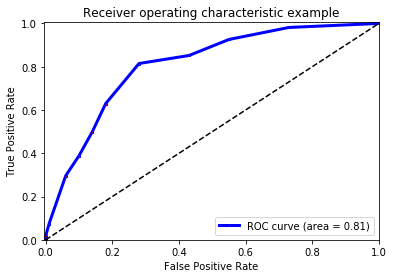

In [14]:

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, lw=3, color ="#0000ff", marker='s',markerfacecolor="red", markersize=2) 
plt.plot([0, 1], [0, 1], 'k--') 

plt.xlim([-0.005, 1.0]) 
plt.ylim([0.0, 1.005])   
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

**Step 9: Pickling the model**

In [0]:

from sklearn.externals import joblib
joblib.dump(model, 'diabetes_pickled.joblib')



In [0]:
clf = joblib.load('diabetes_pickled.joblib')

In [0]:
adhoc_predict2 = diab[["preg", "pedi", "age", "pres","plas","mass"]]
adhoc_predict2.head()

In [0]:
adhoc_predict2.dropna(inplace = True)
clf.predict(adhoc_predict2)